In [0]:
!pip install numpy==1.15.0
!pip install pandas==0.22.0
!pip install matplotlib==2.2.2
!pip install scikit-learn==0.15.0
!pip install keras
!pip install tensorflow==1.7.0

First of all we need to install all the dependencies for our demo. The above packages are need for running our demo.

In [2]:
import pandas as pd
import numpy as np
np.random.seed(1337)
from matplotlib import pyplot as plt
from keras.models import Sequential,model_from_json
import keras
from sklearn.cross_validation import train_test_split
from keras.utils import np_utils

Using TensorFlow backend.


As in every python/any language we need to import the necessary libraries.The above modules are necessary for our demo

In [0]:
def load_from_mnist(self):
    mnist=keras.datasets.mnist
    (x_train, x_train_label),(x_test, x_test_label) = mnist.load_data()
    x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
    x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
    return x_test,x_test_label,x_train,x_train_label

Any machine learning or deep learning program start with dataset preparation. Dataset preparation involves cleansing the data, labeling the data, splitting the dataset into train and test  etc. Fortunately  we dont need to prepare the dataset since we are using open source dataset  [MNIST](http://yann.lecun.com/exdb/mnist/) dataset which contains images of 0-9 and these are also labelled for us to use. So we divide the dataset into two parts train and test. train dataset has 60000 images and test dataset has 10000 images. In keras we have a module called mnist through which we load and split the data.

In [0]:
def gen_model(self):
    self.model.add(keras.layers.Conv2D(filters=6, kernel_size=5, strides=(1, 1), padding="same", input_shape=(28, 28, 1),
                                  data_format="channels_last", activation="relu"))
    self.model.add(keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    self.model.add(keras.layers.Conv2D(filters=16, kernel_size=5, strides=(1, 1), padding="valid", activation="relu"))
    self.model.add(keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    self.model.add(keras.layers.Flatten())
    self.model.add(keras.layers.Dense(120, input_shape=(400,), activation='relu'))
    self.model.add(keras.layers.Dense(84, input_shape=(120,), activation='relu'))
    self.model.add(keras.layers.Dense(units=10, activation='softmax'))

The next step in Deep learning is to decide on the network/model/deep learning algorthm to use. Since we need to detect what is the number in the image we will be using [LENET ](http://yann.lecun.com/exdb/lenet/)architecture which is light weight and takes less computational power. So, we need to construct the Lenet algorithm using keras layers. Here we are using a sequential model which means it will be executing it in a sequential way. We will start adding layer by layer using "add" function. Here we are using 3 unique layers. Convolution, MaxPool and fullyconnected layer(Dense layer). We use flatten to convert a 2D or 3D dimensional tensor into 1D tensor. 


In [0]:
def encode_data(self):
    self.x_train_label = np_utils.to_categorical(self.x_train_label, self.no_of_classes)
    self.x_test_label = np_utils.to_categorical(self.x_test_label, self.no_of_classes)

Next step is to encode the labels of test and train data. We will encode the labels since computer can understand only binary data but the mnist dataset contains output lables as 0-9 decimals. We encode the label as "1" as "0 1 0 0 0 0 0 0 0 0" ans 2 as "0 0 1 0 0 0 0 0 0 0" this encoding can be done by keras utils library."np_util.to_categorical" convert decimal into the conversion whch we discussed before.

In [0]:
def train_model(self):
    self.model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
#    self.model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])load_from_mnist
    self.model.fit(self.x_train, self.x_train_label, epochs=self.no_of_epochs, batch_size=self.batch_size)

So, its time for training our model. For training a model we need two things. One loss function and other optimizer. Loss function will try to calculate difference between observed and actual. Optimizer will try to optimize the loss function in a way it learns the weights faster. So, for this demo we choose "categorical_crossentropy" as loss function and optimizer as "adam". You can experiment with loss and optimizer to check which fits best for your algorithm. First we need to attach the loss and optimizer to our model and then using fit function we train our model using keras "fit" function which we use to train our model by passing the train data and its encoded labels. Here you can see two more arguments "epoch" and "batch_size". Here epoch means how many times you want to repeat your train data. For each epoch our model learns more and more about our data. You may under the assumption that if more epoch = more accurary thats true partially because there will be a saturation point after a certain epoch your model accurary doesn't change. So, epoch should be choosen wisely. Batchsize is how many input dataset items to train parallely. So, the advantage your computational power decreases and model can learn better parallely. Batch size has a limitation on the computational power. If you put more batchsize your machine may say out of memory.


In [0]:
def predict_output(self):
    # loss_and_metrics = model.evaluate(x_test, x_test_label,batch_size=32)
    classes = self.model.predict(self.x_test, batch_size=self.batch_size)
    classes = classes.argmax(axis=1)
    for row in range(0, 3):
        plt.title("label=%s" % classes[row])
        plt.imshow(np.reshape(self.x_test[row], (28, 28)), cmap='gray')
        plt.show()

So its time for inference. predict_output will do the inference on the test dataset and provide us with accuracy and loss numbers. So, keras model has a function predict which will predict based on the training. We pass test dataset of 10000 data points and a batch size. The output of the function is a 10000*10 tensor, we use argmax(axis=1) function to get max index value of 1x10 tensor. 

In [0]:
def save_model(self):
    model_json = self.model.to_json()
    with open("%s.json" % self.save_model_name, "w") as json_file:
        json_file.write(model_json)
    # serialize weights to HDF5
    self.model.save_weights("%s.h5" % self.save_model_name)

We don't need to train our model everytime we wanted to test or make predictions. We can save our model once we train our model. So, we store our model in json format. We need to save our weights as well.

In [0]:
def load_model(self):
    print("Loading model from disk")
    # load json and create model
    json_file = open('%s.json' % self.save_model_name, 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    self.model = model_from_json(loaded_model_json)
    # load weights into new model
    self.model.load_weights("%s.h5" % self.save_model_name)
    print("Loaded model from disk")

Inorder to use our pretrained model and weights we need to load our model. We use "load_weights" to load the pretrained weights.

In [0]:
class digit_recognition:
    def __init__(self):
        self.model=Sequential()
#        self.x_test,self.x_test_label,self.x_train,self.x_train_label=self.load_split_data()
        self.x_test, self.x_test_label, self.x_train, self.x_train_label = self.load_from_mnist() #load data from mnist
        self.no_of_epochs=5
        self.batch_size=300
        self.save_model_name='lenet'
        self.no_of_classes=10
#    load_split_data=load_split_data
    encode_data=encode_data
    gen_model=gen_model
    train_model=train_model
    predict_output=predict_output
    save_model=save_model
    load_model=load_model
    load_from_mnist=load_from_mnist

We define a class called "digit_recognition" where we link all our functions and initialize our model parameters.

In [0]:
def digit_recog_crt():
    digit=digit_recognition()
    digit.encode_data()
    digit.gen_model()
    digit.train_model()
    digit.predict_output()
    digit.save_model()

def digit_recog_reuse():
    digit = digit_recognition()
    digit.encode_data()
    digit.load_model()
    digit.predict_output()

Here we define two functions "digit_recog_crt" and "digit_recog_reuse". we use "digit_recog_crt" function to train and test and "digit_recog_reuse" function to reuse the trained model and load the model to test or predict.

11501568/11490434 [==============================] - 0s 0us/step
Epoch 1/5
60000/60000 [==============================] - 38s 634us/step - loss: 1.4108 - acc: 0.7851
Epoch 2/5
60000/60000 [==============================] - 37s 620us/step - loss: 0.1459 - acc: 0.9548
Epoch 3/5
60000/60000 [==============================] - 38s 632us/step - loss: 0.0915 - acc: 0.9717
Epoch 4/5
60000/60000 [==============================] - 38s 635us/step - loss: 0.0650 - acc: 0.9803
Epoch 5/5
60000/60000 [==============================] - 37s 622us/step - loss: 0.0510 - acc: 0.9840


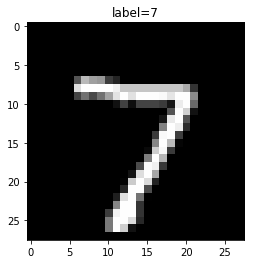

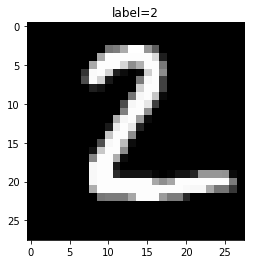

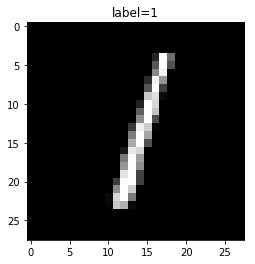

In [14]:
if __name__ == '__main__':
    digit_recog_crt()
#    digit_recog_reuse()
